In [14]:
# !pip install quandl
# !pip install pandas_datareader

In [15]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset
#import statsmodels.api as sm
#from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

import pandas_datareader.data as web
import requests
import io

import quandl
import yfinance as yf

import os
import glob

In [16]:
today     = datetime.today().date()
end_date  = today - timedelta(days=1)
start_date = "2010-01-01"

# Dollar index dxy

In [17]:
# Broad trade-weighted dollar index, Jan 2006=100

dxy_fred = web.DataReader(
    "DTWEXBGS",      # Broad index (not discontinued)
    "fred",
    start=start_date,
    end=end_date
)

# Clean up
dxy_fred.columns = ["DXY"]
dxy_fred.sort_index(inplace=True)

# 3) reindex to include every calendar day, and forward-fill
full_idx = pd.date_range(start=dxy_fred.index.min(), 
                         end=end_date, 
                         freq="D")
dxy_daily = dxy_fred.reindex(full_idx)       # introduce NaNs on weekends/holidays
dxy_daily.ffill(inplace=True)                # carry the last non-NaN forward


dxy_daily.head()


,DXY
2010-01-01,NaN
2010-01-02,NaN
2010-01-03,NaN
2010-01-04,92.3566
2010-01-05,92.2236


In [18]:
dxy_daily.tail()

,DXY
2025-07-18,120.7674
2025-07-19,120.7674
2025-07-20,120.7674
2025-07-21,120.7674
2025-07-22,120.7674


<Axes: title={'center': 'Broad Trade-Weighted Dollar Index (DXY)'}>

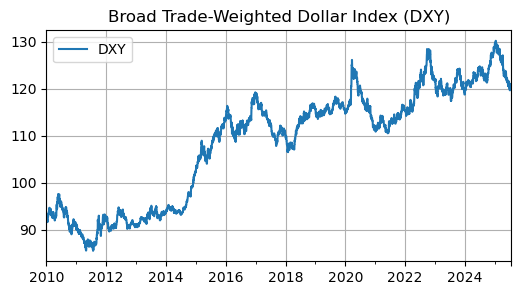

In [19]:
dxy_daily.plot(figsize=(6, 3), title="Broad Trade-Weighted Dollar Index (DXY)", grid=True)

In [20]:
output_path = "../Data/other/dxy.csv"
dxy_daily.to_csv(output_path, index=True)

print(f"Saved {len(dxy_daily)} rows to {output_path}, up through {end_date}")

Saved 5682 rows to ../Data/other/dxy.csv, up through 2025-07-22


# M2 money supply

In [21]:
codes = {
    "US": "M2SL",            # U.S. M2 Money Stock :contentReference[oaicite:0]{index=0}
    #"EA": "MYAGM2EZM196N",   # Euro‐Area M2 :contentReference[oaicite:1]{index=1}
    #"CN": "MYAGM2CNM189N",   # China M2 :contentReference[oaicite:2]{index=2}
    # …add Japan, U.K., etc. as needed
}

# Fetch each series and align on a common DateTimeIndex
df = pd.DataFrame({
    country: web.DataReader(code, "fred", start_date, end_date)[code]
    for country, code in codes.items()
})

# 2) Build a full daily calendar index
full_idx = pd.date_range(start=df.index.min(),
                         end=end_date,
                         freq="D")

# 3) Reindex and forward‐fill
df_daily = df.reindex(full_idx)  # will introduce NaNs on non‐report days
df_daily.ffill(inplace=True)     # carry last monthly figure forward

#df.to_csv("../Data/M2_supply.csv", index=True)
df_daily.head()


,US
2010-01-01,8478.0
2010-01-02,8478.0
2010-01-03,8478.0
2010-01-04,8478.0
2010-01-05,8478.0


In [22]:
df_daily.tail()

,US
2025-07-18,22020.8
2025-07-19,22020.8
2025-07-20,22020.8
2025-07-21,22020.8
2025-07-22,22020.8


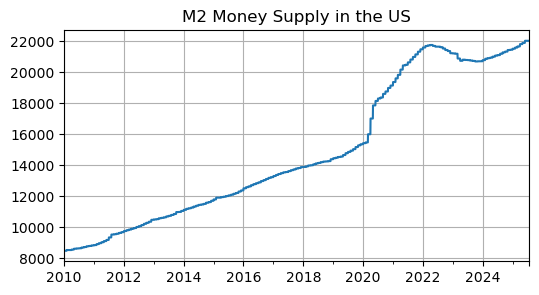

In [23]:
df_daily['US'].plot(figsize=(6, 3), title="M2 Money Supply in the US", grid=True)
plt.show()
# df['EA'].plot(figsize=(10, 5), title="M2 Money Supply in the Euro Area", grid=True)
# plt.show()
# df['CN'].plot(figsize=(10, 5), title="M2 Money Supply in China", grid=True)
# plt.show()

In [24]:
output_path="../Data/other/M2_supply.csv"
df_daily.to_csv(output_path, index=True)
print(f"Saved {len(df_daily)} rows to {output_path}, up through {end_date}")

Saved 5682 rows to ../Data/other/M2_supply.csv, up through 2025-07-22


# fed funds rate

In [25]:
fed_rate = web.DataReader('DFF', 'fred', start_date, end_date)

# 3) Rename column for clarity
fed_rate.columns = ['fed_funds_rate']

fed_rate.sort_index(inplace=True)
fed_rate.head()

,fed_funds_rate
DATE,
2010-01-01,0.05
2010-01-02,0.05
2010-01-03,0.05
2010-01-04,0.12
2010-01-05,0.12


In [26]:
fed_rate.tail()

,fed_funds_rate
DATE,
2025-07-17,4.33
2025-07-18,4.33
2025-07-19,4.33
2025-07-20,4.33
2025-07-21,4.33


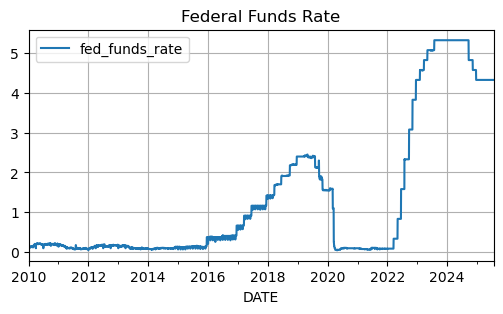

In [27]:
fed_rate.plot(figsize=(6, 3), title="Federal Funds Rate", grid=True)
plt.show()

In [28]:
output_path="../Data/other/fed_rate.csv"
fed_rate.to_csv(output_path, index=True)
print(f"Saved {len(fed_rate)} rows to {output_path}, up through {end_date}")

Saved 5681 rows to ../Data/other/fed_rate.csv, up through 2025-07-22


# Gold price

In [29]:
gld = yf.download("GLD", start=start_date, end=end_date)
gld_close = gld['Close'][['GLD']]
gld_close.rename(columns={"GLD": "gold"}, inplace=True)

full_idx = pd.date_range(start=gld_close.index.min(),
                         end=end_date,
                         freq="D")

# 3) Reindex and forward‐fill
gld_close = gld_close.reindex(full_idx)  # will introduce NaNs on non‐report days
gld_close.ffill(inplace=True)     # carry last monthly figure forward


gld_close.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,gold
2010-01-04,109.800003
2010-01-05,109.699997
2010-01-06,111.510002
2010-01-07,110.820000
2010-01-08,111.370003


In [30]:
gld_close.tail()

Ticker,gold
2025-07-18,308.390015
2025-07-19,308.390015
2025-07-20,308.390015
2025-07-21,313.130005
2025-07-22,313.130005


<Axes: title={'center': 'Gold Price (GLD)'}>

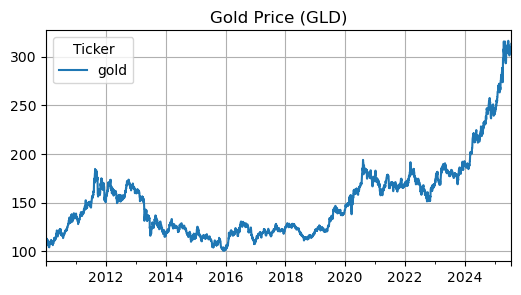

In [31]:
gld_close.plot(figsize=(6, 3), title="Gold Price (GLD)", grid=True)

In [32]:
output_path="../Data/other/gold.csv"
gld_close.to_csv(output_path, index=True)
print(f"Saved {len(gld_close)} rows to {output_path}, up through {end_date}")

Saved 5679 rows to ../Data/other/gold.csv, up through 2025-07-22


# S&P 500

In [33]:
sp500 = yf.download("^GSPC", start=start_date, end=end_date)

# 3) Extract just the Close column
sp500_close = sp500[["Close"]].rename(columns={"Close": "SP500"})

sp500_close.columns = ['SP500']

full_idx = pd.date_range(start=gld_close.index.min(),
                         end=end_date,
                         freq="D")

# 3) Reindex and forward‐fill
sp500_close= sp500_close.reindex(full_idx)  # will introduce NaNs on non‐report days
sp500_close.ffill(inplace=True)     # carry last monthly figure forward


# 4) (Optional) Inspect
print(sp500_close.head())
print(sp500_close.tail())

[*********************100%***********************]  1 of 1 completed

                  SP500
2010-01-04  1132.989990
2010-01-05  1136.520020
2010-01-06  1137.140015
2010-01-07  1141.689941
2010-01-08  1144.979980
                  SP500
2025-07-18  6296.790039
2025-07-19  6296.790039
2025-07-20  6296.790039
2025-07-21  6305.600098
2025-07-22  6305.600098


<Axes: title={'center': 'S&P 500 Index'}>

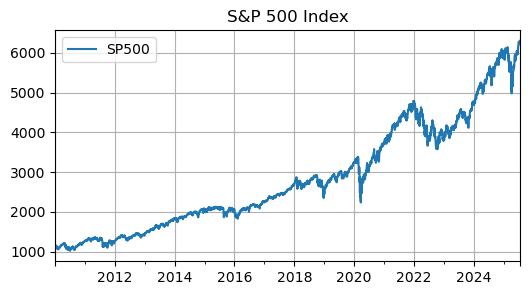

In [34]:
sp500_close.plot(figsize=(6, 3), title="S&P 500 Index", grid=True)

In [35]:
output_path="../Data/other/sp500.csv"
sp500_close.to_csv(output_path, index=True)
print(f"Saved {len(sp500_close)} rows to {output_path}, up through {end_date}")

Saved 5679 rows to ../Data/other/sp500.csv, up through 2025-07-22


# NVIDIA

Later we can add

Marathon Digital (MARA) – pure-play miner with high BTC-beta

Riot Platforms (RIOT) – another large miner, very sensitive to BTC moves

Coinbase (COIN) – the biggest U.S. crypto exchange, trading volumes track price action

AMD (AMD) – GPU supplier, benefits from miners buying rigs when BTC is up

Block (SQ) – Cash App BTC flows give it a quasi-crypto play

In [36]:
nvda = yf.download("NVDA", start=start_date, end=end_date)

# 3) Extract only the closing price and flatten the column
nvda_close = nvda[["Close"]]
nvda_close.columns= ['NVDA']
# if you get a MultiIndex: nvda_close.columns = nvda_close.columns.droplevel('Ticker')

full_idx = pd.date_range(start=gld_close.index.min(),
                         end=end_date,
                         freq="D")

# 3) Reindex and forward‐fill
nvda_close= nvda_close.reindex(full_idx)  # will introduce NaNs on non‐report days
nvda_close.ffill(inplace=True)     # carry last monthly figure forward


# 4) (Optional) Inspect
print(nvda_close.head())
print(nvda_close.tail())

[*********************100%***********************]  1 of 1 completed

                NVDA
2010-01-04  0.423854
2010-01-05  0.430044
2010-01-06  0.432794
2010-01-07  0.424313
2010-01-08  0.425230
                  NVDA
2025-07-18  172.410004
2025-07-19  172.410004
2025-07-20  172.410004
2025-07-21  171.380005
2025-07-22  171.380005


<Axes: title={'center': 'NVIDIA Stock Price'}>

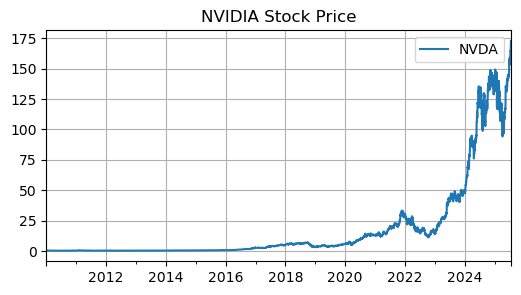

In [37]:
nvda_close.plot(figsize=(6, 3), title="NVIDIA Stock Price", grid=True)

In [38]:
output_path="../Data/other/nvdia.csv"
nvda_close.to_csv(output_path, index=True)
print(f"Saved {len(nvda_close)} rows to {output_path}, up through {end_date}")

Saved 5679 rows to ../Data/other/nvdia.csv, up through 2025-07-22


# Microstrategy

[*********************100%***********************]  1 of 1 completed

             MSTR
2010-01-04  9.616
2010-01-05  9.784
2010-01-06  9.634
2010-01-07  9.249
2010-01-08  9.500
                  MSTR
2025-07-18  423.220001
2025-07-19  423.220001
2025-07-20  423.220001
2025-07-21  426.279999
2025-07-22  426.279999


<Axes: title={'center': 'MicroStrategy Stock Price'}>

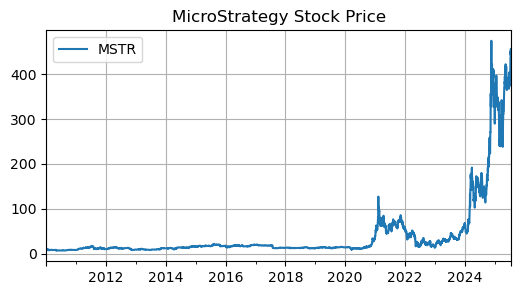

In [39]:
mstr = yf.download("MSTR", start=start_date, end=end_date)

# 3) Extract only the closing price and flatten the column
mstr_close = mstr[["Close"]]
mstr_close.columns= ['MSTR']
# If you see a MultiIndex, you can drop the extra level:
# mstr_close.columns = mstr_close.columns.droplevel('Ticker')

full_idx = pd.date_range(start=gld_close.index.min(),
                         end=end_date,
                         freq="D")

# 3) Reindex and forward‐fill
mstr_close= mstr_close.reindex(full_idx)  # will introduce NaNs on non‐report days
mstr_close.ffill(inplace=True)     # carry last monthly figure forward


# 4) (Optional) Inspect
print(mstr_close.head())
print(mstr_close.tail())
mstr_close.plot(figsize=(6, 3), title="MicroStrategy Stock Price", grid=True)

In [40]:
output_path="../Data/other/mstr.csv"
mstr_close.to_csv(output_path, index=True)
print(f"Saved {len(mstr_close)} rows to {output_path}, up through {end_date}")

Saved 5679 rows to ../Data/other/mstr.csv, up through 2025-07-22


# Microstrategy purchases

In [41]:
# 1) Read the CSV into a DataFrame
df = pd.read_csv("../Data/Microstrategy/Microstrategy_purchases.csv", parse_dates=["Reported"])
df.set_index("Reported", inplace=True)
df.sort_index(inplace=True)

df.rename(columns={
    "Avg BTC\nCost": "Avg BTC Cost",
    "BTC\nHoldings": "BTC Holdings"
}, inplace=True)

# 2) Clean numeric columns (remove commas and convert to float)
df["BTC Acquisitions"] = df["BTC Acquisitions"].str.replace(",", "").astype(float)
df["BTC_Holdings"]     = df["BTC Holdings"].str.replace(",", "").astype(float)

# 3) Build a full daily index from the first to last report date
full_idx = pd.date_range(start=start_date, end=end_date, freq="D")

# 4) Reindex to daily
daily = pd.DataFrame(index=full_idx).join(
    df[["BTC Acquisitions", "BTC_Holdings"]], how="left"
)

# 5) Fill missing and forward‐fill, **without** inplace chained ops
daily["BTC Acquisitions"] = daily["BTC Acquisitions"].fillna(0)
daily["BTC_Holdings"]     = daily["BTC_Holdings"].ffill().fillna(0)

# 6) Compute the 30-day rolling sum
daily["BTC_Pur_30d"] = (
    daily["BTC Acquisitions"]
         .rolling(window=30, min_periods=1)
         .sum()
)

# 7) Extract your features
features = daily[["BTC_Pur_30d", "BTC_Holdings"]]

print(features.head())
print(features.tail())

            BTC_Pur_30d  BTC_Holdings
2010-01-01          0.0           0.0
2010-01-02          0.0           0.0
2010-01-03          0.0           0.0
2010-01-04          0.0           0.0
2010-01-05          0.0           0.0
            BTC_Pur_30d  BTC_Holdings
2025-07-18       9450.0      601550.0
2025-07-19       9450.0      601550.0
2025-07-20       9450.0      601550.0
2025-07-21      15670.0      607770.0
2025-07-22      15670.0      607770.0


<Axes: title={'center': 'MicroStrategy Bitcoin Holdings and Purchases'}>

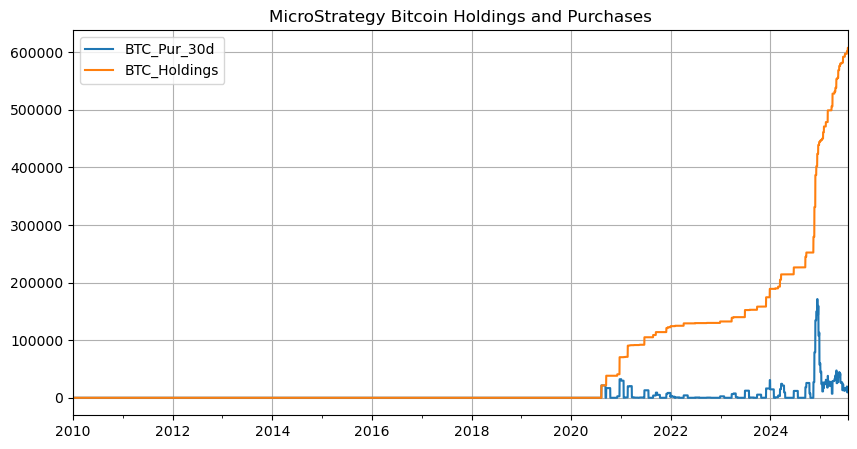

In [42]:
features.plot(figsize=(10, 5), title="MicroStrategy Bitcoin Holdings and Purchases", grid=True)

In [43]:
output_path="../Data/other/mstr_feature.csv"
features.to_csv(output_path, index=True)
print(f"Saved {len(features)} rows to {output_path}, up through {end_date}")

Saved 5682 rows to ../Data/other/mstr_feature.csv, up through 2025-07-22


# Fed rate expectation

9N9csm5xmhS4LhowKyDA

In [44]:
# # import quandl
# # import pandas as pd
# # from datetime import datetime, timedelta

# # 1) Configure your Quandl API key
# quandl.ApiConfig.api_key = "9N9csm5xmhS4LhowKyDA"


# # 3) Download the continuous Fed Funds futures contract
# #    Code “CHRIS/CME_FF” is the 30-day Fed Funds continuous future :contentReference[oaicite:0]{index=0}
# ff = quandl.get(
#     "CHRIS/CME_FF",
#     start_date=start_date,
#     end_date=end_date
# )

# # 4) Compute the implied Fed Funds rate = 100 − Settle price
# #    “Settle” is the daily settlement price of the front‐month contract
# ff["Implied_FedFunds"] = 100.0 - ff["Settle"]

# # 5) Reindex to a full daily calendar and forward-fill gaps
# full_idx = pd.date_range(ff.index.min(), ff.index.max(), freq="D")
# ff_daily = ff.reindex(full_idx)
# ff_daily["Implied_FedFunds"] = ff_daily["Implied_FedFunds"].ffill()

# # 6) Keep only the implied rate and save
# fedfunds_expectation = ff_daily[["Implied_FedFunds"]]
# #fedfunds_expectation.to_csv("../Data/fedfunds_implied.csv", index_label="Date")

# print(fedfunds_expectation.head())
# print(fedfunds_expectation.tail())


# CPI index

            inflation
2010-01-01   2.621111
2010-01-02   2.621111
2010-01-03   2.621111
2010-01-04   2.621111
2010-01-05   2.621111
            inflation
2025-07-18   2.672683
2025-07-19   2.672683
2025-07-20   2.672683
2025-07-21   2.672683
2025-07-22   2.672683


<Axes: title={'center': 'CPI Index and Inflation Rates'}>

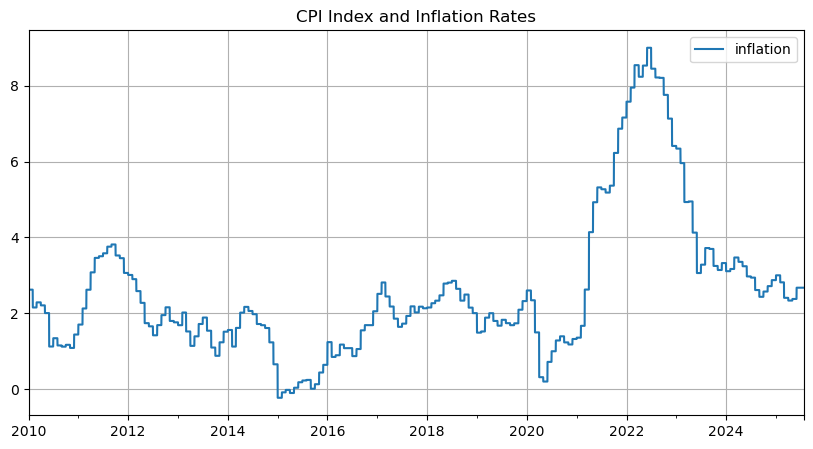

In [45]:
start_date_lag = (
    pd.to_datetime(start_date) 
    - pd.DateOffset(years=1)
).strftime("%Y-%m-%d")

# 2) Fetch CPI from one year before through your end
cpi = web.DataReader("CPIAUCSL", "fred", start_date_lag, end_date)
cpi.rename(columns={"CPIAUCSL": "CPI_Index"}, inplace=True)

# 3) Compute the annual inflation rate
#    (percent change over 12 months)
cpi["inflation"] = cpi["CPI_Index"].pct_change(periods=12) * 100

# 4) Now slice off that “extra” year so your data begins at start_date
cpi = cpi.loc[start_date:]

# 5) Keep only the annual inflation column
inflation = cpi[["inflation"]]

full_idx = pd.date_range(start=start_date,
                         end=end_date,
                         freq="D")

# 3) Reindex and forward‐fill
inflation= inflation.reindex(full_idx)  # will introduce NaNs on non‐report days
inflation.ffill(inplace=True)     # carry last monthly figure forward


print(inflation.head())   # will start at 2010-01-31 with a valid number
print(inflation.tail())
inflation.plot(figsize=(10, 5), title="CPI Index and Inflation Rates", grid=True)

In [46]:
output_path="../Data/other/inflation.csv"
inflation.to_csv(output_path, index=True)
print(f"Saved {len(inflation)} rows to {output_path}, up through {end_date}")

Saved 5682 rows to ../Data/other/inflation.csv, up through 2025-07-22
